---

# Clustering Cities Of Africa - IBM Data Science Capstone Project

#### Developed by : Achraf Ougdal

---

This project is part of the IBM's Data Science Professional Certificate's Capstone Project. In this project, our task is to cluster more than 900 cities in Africa based on their location, population, density, surface, built-up area and their popular avenues. Then we will look at each cluster to find out which cluster offers most diverse characteristics so that we could choose a city of that cluster as our future summer vacation destination.

---

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import json
import time
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import folium
import seaborn as sns
import matplotlib.pyplot as plt

---

#### 1. Gathering data

In [2]:
# Agglomeration Data
agg_data = pd.read_excel("Africapolis_agglomeration_2015.xlsx", sheet_name=0, skiprows=15, nrows=900)

# Countries Data
country_data = pd.read_excel("Africapolis_country.xlsx", sheet_name=0, skiprows=15)

In [3]:
# return the first 5 rows of the agglomeration data
agg_data.head()

,Agglomeration_ID,Agglomeration_Name,ISO3,Longitude,Latitude,Altitude,Population_2015,Density_2015,Builtup,Distance to metro,Closest Metro,Voronoi,Population_1950,Population_1960,Population_1970,Population_1980,Population_1990,Population_2000,Population_2010,Metropole
0,1,Cairo,EGY,31.324,30.130,23.64876,22995802.0,12959.689136,1774.41,0.000000,Cairo,901,2.561779e+06,3.877835e+06,5.706767e+06,7.662514e+06,9.934584e+06,1.190130e+07,1.617987e+07,Yes
1,2,Lagos,NGA,3.316,6.668,42.75930,11847635.0,10838.762945,1093.08,0.000000,Lagos,622,2.888950e+05,8.223200e+05,1.487000e+06,2.690000e+06,4.865000e+06,7.241000e+06,1.077800e+07,Yes
2,3,Onitsha,NGA,6.928,5.815,97.89711,8530514.0,3145.597351,2711.89,296.452513,Malabo,646,7.307495e+04,1.567715e+05,2.480000e+05,3.920000e+05,6.200000e+05,1.450000e+06,6.351000e+06,No
3,4,Johannesburg,ZAF,28.016,-26.050,1629.55100,8314220.0,3755.191820,2214.06,0.000000,Johannesburg,1054,8.755273e+05,1.602286e+06,2.168025e+06,2.909020e+06,3.344532e+06,4.109030e+06,7.180906e+06,Yes
4,5,Kinshasa,COD,15.293,-4.408,308.86780,7270000.0,16923.506681,429.58,0.000000,Kinshasa,2179,1.554284e+05,4.511494e+05,1.249348e+06,2.098741e+06,3.632507e+06,4.425321e+06,5.750000e+06,Yes


In [4]:
# return the first 5 rows of the country data
country_data.head()

,Country,Country_FR,AU_Regions,ISO,Upop2015,Urbanlevel2015,NumAgglos2015,Mpop2015,ADBA2015,Usurf,...,Mpop1990,Mpop2000,Mpop2010,ADBA1950,ADBA1960,ADBA1970,ADBA1980,ADBA1990,ADBA2000,ADBA2010
0,Angola,Angola,Southern Africa,AGO,15862758.0,0.630000,96,0.439975,54.2,0.001879,...,0.472250,0.455668,0.499518,189,179,199,127,93,73,57
1,Burundi,Burundi,Central Africa,BDI,2054027.0,0.210000,33,0.508195,15.1,0.020619,...,0.791461,0.772060,0.519364,0,0,0,64,44,48,17
2,Benin,Bénin,West Africa,BEN,5272274.0,0.488542,122,0.398255,14.2,0.010811,...,0.579598,0.545338,0.437349,45,62,43,40,34,25,17
3,Burkina Faso,Burkina Faso,West Africa,BFA,5271971.0,0.290136,101,0.562761,28.3,0.004311,...,0.600902,0.558700,0.571655,141,143,135,58,52,38,34
4,Botswana,Botswana,Southern Africa,BWA,1224313.0,0.560000,25,0.298489,54.6,0.001344,...,0.258901,0.261663,0.282965,0,0,79,92,59,53,59


---

### 2. Cleaning and merging Data 

#### - Cleaning Agglomeration Data

In [5]:
# return the first 5 rows of the agglomeration data
agg_data.head()

,Agglomeration_ID,Agglomeration_Name,ISO3,Longitude,Latitude,Altitude,Population_2015,Density_2015,Builtup,Distance to metro,Closest Metro,Voronoi,Population_1950,Population_1960,Population_1970,Population_1980,Population_1990,Population_2000,Population_2010,Metropole
0,1,Cairo,EGY,31.324,30.130,23.64876,22995802.0,12959.689136,1774.41,0.000000,Cairo,901,2.561779e+06,3.877835e+06,5.706767e+06,7.662514e+06,9.934584e+06,1.190130e+07,1.617987e+07,Yes
1,2,Lagos,NGA,3.316,6.668,42.75930,11847635.0,10838.762945,1093.08,0.000000,Lagos,622,2.888950e+05,8.223200e+05,1.487000e+06,2.690000e+06,4.865000e+06,7.241000e+06,1.077800e+07,Yes
2,3,Onitsha,NGA,6.928,5.815,97.89711,8530514.0,3145.597351,2711.89,296.452513,Malabo,646,7.307495e+04,1.567715e+05,2.480000e+05,3.920000e+05,6.200000e+05,1.450000e+06,6.351000e+06,No
3,4,Johannesburg,ZAF,28.016,-26.050,1629.55100,8314220.0,3755.191820,2214.06,0.000000,Johannesburg,1054,8.755273e+05,1.602286e+06,2.168025e+06,2.909020e+06,3.344532e+06,4.109030e+06,7.180906e+06,Yes
4,5,Kinshasa,COD,15.293,-4.408,308.86780,7270000.0,16923.506681,429.58,0.000000,Kinshasa,2179,1.554284e+05,4.511494e+05,1.249348e+06,2.098741e+06,3.632507e+06,4.425321e+06,5.750000e+06,Yes


In [6]:
# print datarame columns
print(list(agg_data.columns))

['Agglomeration_ID', 'Agglomeration_Name', 'ISO3', 'Longitude', 'Latitude', 'Altitude', 'Population_2015', 'Density_2015', 'Builtup', 'Distance to metro', 'Closest Metro', 'Voronoi', 'Population_1950', 'Population_1960', 'Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Metropole']


In this dataset, we will only need 8 columns :
- Agglomeration_Name : Name of the city
- ISO3 : Country Code
- Longtitude
- Latitude
- Altitude
- Population_2015
- Density 2015
- Builtup : Built-up area

Therefore, Let's drop all the other columns

In [7]:
# dropping unnesessary columns
agg_data = agg_data[['Agglomeration_Name', 'ISO3', 'Longitude', 'Latitude', 'Altitude', 'Population_2015', 'Density_2015', 'Builtup']]
print("\nThis Dataframe has ", agg_data.shape[0], ' rows and ', agg_data.shape[1], ' columns.\n')
agg_data.head()


This Dataframe has  900  rows and  8  columns.



,Agglomeration_Name,ISO3,Longitude,Latitude,Altitude,Population_2015,Density_2015,Builtup
0,Cairo,EGY,31.324,30.130,23.64876,22995802.0,12959.689136,1774.41
1,Lagos,NGA,3.316,6.668,42.75930,11847635.0,10838.762945,1093.08
2,Onitsha,NGA,6.928,5.815,97.89711,8530514.0,3145.597351,2711.89
3,Johannesburg,ZAF,28.016,-26.050,1629.55100,8314220.0,3755.191820,2214.06
4,Kinshasa,COD,15.293,-4.408,308.86780,7270000.0,16923.506681,429.58


#### Renaming Columns

We need to rename multiple columns : 
- Rename Population_2015 to **Population**
- Rename Density_2015 to **Density**
- Rename Agglomeration_Name to **City**

In [8]:
# Renaming Columns
agg_data.rename(columns={
    "Agglomeration_Name": "City",
    "Population_2015": "Population",
    "Density_2015": "Density"
}, inplace=True)

agg_data.head()

,City,ISO3,Longitude,Latitude,Altitude,Population,Density,Builtup
0,Cairo,EGY,31.324,30.130,23.64876,22995802.0,12959.689136,1774.41
1,Lagos,NGA,3.316,6.668,42.75930,11847635.0,10838.762945,1093.08
2,Onitsha,NGA,6.928,5.815,97.89711,8530514.0,3145.597351,2711.89
3,Johannesburg,ZAF,28.016,-26.050,1629.55100,8314220.0,3755.191820,2214.06
4,Kinshasa,COD,15.293,-4.408,308.86780,7270000.0,16923.506681,429.58


#### Check Columns types and missing values

In [9]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
City          900 non-null object
ISO3          900 non-null object
Longitude     900 non-null float64
Latitude      900 non-null float64
Altitude      900 non-null float64
Population    900 non-null float64
Density       900 non-null float64
Builtup       900 non-null float64
dtypes: float64(6), object(2)
memory usage: 56.4+ KB


**We can clearly see that there are no missing values and all columns types are correct. So, The cleaning for this dataframe is done properly.**

#### - Cleaning Country Data

In [10]:
# return the first 5 rows of the country data
country_data.head()

,Country,Country_FR,AU_Regions,ISO,Upop2015,Urbanlevel2015,NumAgglos2015,Mpop2015,ADBA2015,Usurf,...,Mpop1990,Mpop2000,Mpop2010,ADBA1950,ADBA1960,ADBA1970,ADBA1980,ADBA1990,ADBA2000,ADBA2010
0,Angola,Angola,Southern Africa,AGO,15862758.0,0.630000,96,0.439975,54.2,0.001879,...,0.472250,0.455668,0.499518,189,179,199,127,93,73,57
1,Burundi,Burundi,Central Africa,BDI,2054027.0,0.210000,33,0.508195,15.1,0.020619,...,0.791461,0.772060,0.519364,0,0,0,64,44,48,17
2,Benin,Bénin,West Africa,BEN,5272274.0,0.488542,122,0.398255,14.2,0.010811,...,0.579598,0.545338,0.437349,45,62,43,40,34,25,17
3,Burkina Faso,Burkina Faso,West Africa,BFA,5271971.0,0.290136,101,0.562761,28.3,0.004311,...,0.600902,0.558700,0.571655,141,143,135,58,52,38,34
4,Botswana,Botswana,Southern Africa,BWA,1224313.0,0.560000,25,0.298489,54.6,0.001344,...,0.258901,0.261663,0.282965,0,0,79,92,59,53,59


In this dataframe, we will need only 2 columns :
- Country
- ISO

Let's drop all the other columns

In [11]:
# dropping unnesessary columns
country_data = country_data[["Country", "ISO"]]
print("\nThis Dataframe has ", country_data.shape[0], ' rows and ', country_data.shape[1], ' columns.\n')
country_data.head()


This Dataframe has  50  rows and  2  columns.



,Country,ISO
0,Angola,AGO
1,Burundi,BDI
2,Benin,BEN
3,Burkina Faso,BFA
4,Botswana,BWA


#### Renaming Columns

We need to rename only one column : 
- Rename ISO to **ISO3**

In [12]:
#renaming columns
country_data.rename(columns={
    "ISO": "ISO3"
}, inplace=True)

country_data.head()

,Country,ISO3
0,Angola,AGO
1,Burundi,BDI
2,Benin,BEN
3,Burkina Faso,BFA
4,Botswana,BWA


#### Check columns types and missing values

In [13]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
Country    50 non-null object
ISO3       50 non-null object
dtypes: object(2)
memory usage: 928.0+ bytes


**We can clearly see that there are no missing values and all columns types are correct. So, The cleaning for this dataframe is finished.**

#### Merging data

In [14]:
# Merging dataframes
dataset =  pd.merge(left=agg_data, right=country_data, left_on='ISO3', right_on="ISO3")

# drop the ISO3 column
dataset.drop('ISO3', axis=1, inplace=True)

print("\nThis Dataframe has ", dataset.shape[0], ' rows and ', dataset.shape[1], ' columns.\n')
dataset.head()


This Dataframe has  900  rows and  8  columns.



,City,Longitude,Latitude,Altitude,Population,Density,Builtup,Country
0,Cairo,31.324,30.130,23.648760,22995802.0,12959.689136,1774.41,Egypt
1,Alexandria,29.797,31.125,1.138264,6585102.0,16809.879001,391.74,Egypt
2,Suhag,31.477,26.714,57.259200,3749685.0,11412.134401,328.57,Egypt
3,al-Mansura,31.289,31.000,4.332259,2018861.0,18017.501116,112.05,Egypt
4,Asyut,31.206,27.215,60.843060,1345668.0,13681.049207,98.36,Egypt


---

### 3. Getting the most popular avenues of each city in 10km radius using Foursquare API

In [15]:
credentials = pd.read_csv('credentials.csv')
CLIENT_ID = credentials.loc[0, "clien_id"]
CLIENT_SECRET = credentials.loc[0, "client_secret"]
VERSION = '20180604'
LIMIT = 100
radius = 10000 #10km
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: YMC4LO41FSCATD5CTRRBVO4AWS5RMAKUEQVPM1VC2N4CPGGL
CLIENT_SECRET:UXSRUF42ZSHEIRNIVNWQSRZNLKENYSA4ZJ13D5SPE3P0AAYP


In [ ]:
city_categories = []

# extract the categories of the avenues in a 10km radius of each city in the dataset
for lat, long, name in zip(dataset["Latitude"], dataset["Longitude"], dataset["City"]):
    time.sleep(1)
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        long, 
        radius, 
        LIMIT)
            
    # make the GET request   
    session = requests.Session()
    retry = Retry(connect=5, backoff_factor=0.6)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    
    results = session.get(url).json()["response"]['groups'][0]['items']
    for venue in results:
        try:
            city_categories.append({"City": name,
                                    "venue_name": venue['venue']['name'],
                                    "Venue_category": venue['venue']['categories'][0]['name']})
            print("{}, {}", name, venue['venue']['name'])
        except:
            pass

In [103]:
pd.DataFrame(city_categories).to_csv("city_categories.csv") To save data

In [164]:
# get the data
categories = pd.read_csv("city_categories.csv")

# print the shape of our data 
print("\nThis Dataframe has ", categories.shape[0], ' rows and ', categories.shape[1], ' columns.\n')

# let's take a look at it
categories.head()


This Dataframe has  8289  rows and  4  columns.



,Unnamed: 0,City,venue_name,Venue_category
0,0,Cairo,Primo's Pizza,Pizza Place
1,1,Cairo,San Marino (سان مارينو),Italian Restaurant
2,2,Cairo,El Gomhuria Restaurant (مطعم الجمهوريه),Falafel Restaurant
3,3,Cairo,Royal House (رويال هاوس),Supermarket
4,4,Cairo,Diwan Bookstore (مكتبة ديوان),Bookstore


Obviously, we need to clean out data and transform it.

In [165]:
# drop the Unnamed: 0 column
categories.drop("Unnamed: 0", axis=1, inplace=True)

# drop the venue_name column
categories.drop("venue_name", axis=1, inplace=True)

categories

,City,Venue_category
0,Cairo,Pizza Place
1,Cairo,Italian Restaurant
2,Cairo,Falafel Restaurant
3,Cairo,Supermarket
4,Cairo,Bookstore
...,...,...
8284,Sao Tome,Hotel
8285,Sao Tome,Airport
8286,Sao Tome,Hotel
8287,Sao Tome,Café


In [166]:
# venue_categories unique values
len(categories['Venue_category'].unique())

379

we have 379 unique category variables, Now we need to transform our data. To do so, we need to get conver the **Venue_category** column (which is a categorical variable) into continuous variable by getting its dummy variables and then group the dataframe by **City**

In [167]:
# get the dummy variables of the Venue_category column
dummies = pd.get_dummies(categories[["Venue_category"]], prefix="", prefix_sep="")

# concatenate the two dataframes
categories_dataset = pd.concat([categories, dummies],axis=1)

# drop the Venue_category column
categories_dataset.drop("Venue_category", axis=1, inplace=True)

# let's take a look at the dataset
categories_dataset.head()


,City,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yemeni Restaurant,Zoo
0,Cairo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cairo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cairo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cairo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cairo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There's a lot of work to do on this dataset.

In [168]:
# delete duplicated columns
categories_dataset = categories_dataset.loc[:,~categories_dataset.columns.duplicated()]

# group data by City name
categories_dataset = categories_dataset.groupby(by="City", as_index=False).sum()

In [169]:
# print the shape of the dataFrame
print("\nThis Dataframe has ", categories_dataset.shape[0], ' rows and ', categories_dataset.shape[1], ' columns.\n')

# save the data as a csv file
categories_dataset.to_csv("categories.csv")


This Dataframe has  804  rows and  379  columns.



As we can see, we are left with 804 cities (insted of 900). it is still a good number to practice our clustering algorithm on.

To finish, all we need to do is to merge the two datasets (the one with the city information and the other with the avenue categories to create the final dataset that we will be working on during next sections

In [170]:
# Merging datasets
full_dataset =  pd.merge(left=dataset, right=categories_dataset, left_on='City', right_on="City")

full_dataset.head()

# saving data to a csv file
full_dataset.to_csv('full_dataset.csv');

---

### 4. Exploratory Data Analysis 

#### Number of cities in each country 

In [171]:
grouped_cities = full_dataset.groupby("Country").count()

grouped_cities[["City"]].head()

,City
Country,
Algeria,57
Angola,25
Benin,7
Botswana,2
Burkina Faso,4


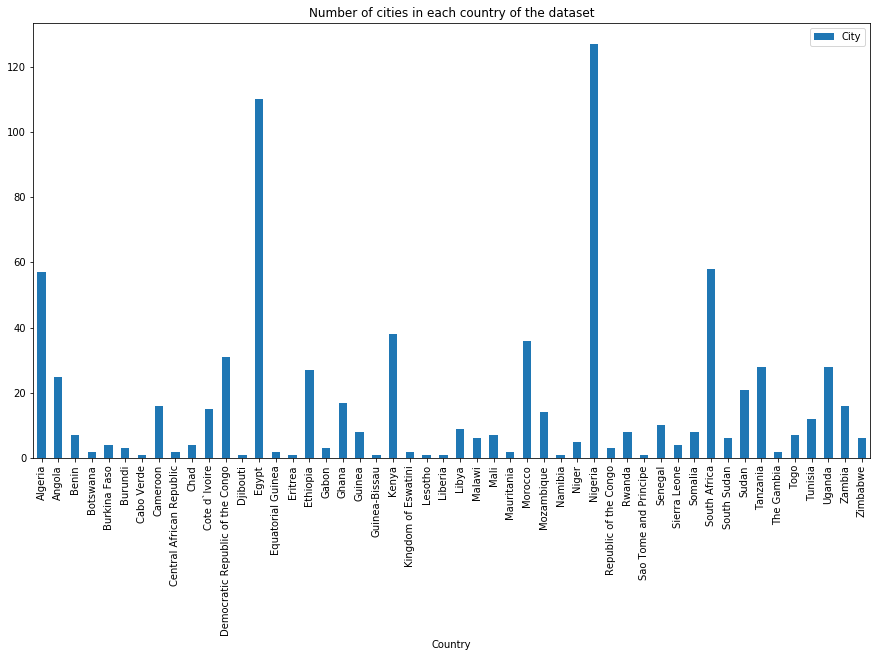

In [172]:
grouped_cities[["City"]].plot.bar(figsize=(15, 8), title="Number of cities in each country of the dataset")

#### Location of each city in Africa - Folium

In [173]:
# creating the map of africa
map_africa = folium.Map(location=[8.7832, 34.5085], zoom_start = 3)

# add markers of each city
for lat, long, name in zip(full_dataset["Latitude"], full_dataset["Longitude"], full_dataset["City"]):
    folium.Marker(
        [lat, long],
        popup=name,
        tooltip=name).add_to(map_africa)
map_africa

---

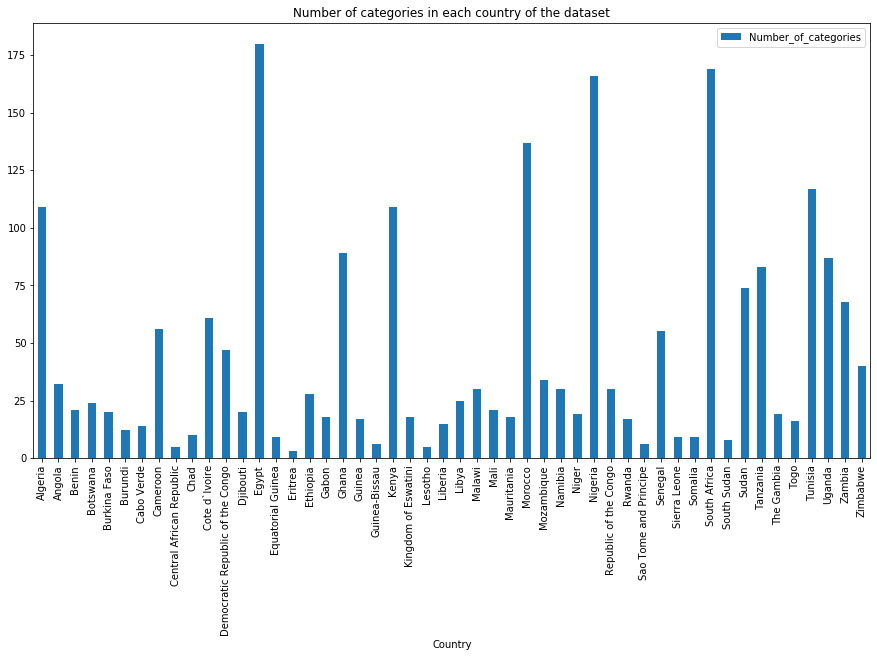

In [195]:
grouped_categories = full_dataset.groupby("Country").apply(lambda x: (x!=0).sum())[categories['Venue_category'].unique()]

grouped_categories["Number_of_categories"] = grouped_categories.apply(lambda x: (x!=0).sum(), axis=1)
grouped_categories[["Number_of_categories"]].plot.bar(figsize=(15, 8), title="Number of categories in each country of the dataset")

Here, we can see that in this dataset, Egypt, Nigeria south africa, Morocco, Tunisia, Kenya and Algeria have the more categories than all the other countries.
One thing to notice is that in Morocco, even that he doesn't occure too many times in the dataset, yet it has more categories than Algeria

---

#### One more thing to do before we continue...

We need to get the dummy variables of the 'Country' column

In [196]:
# get the dummy variables of the Country column
dummies = pd.get_dummies(full_dataset[["Country"]], prefix="", prefix_sep="")

# concatenate the two dataframes
full_dataset = pd.concat([full_dataset, dummies],axis=1)

# drop the Country column
full_dataset.drop("Country", axis=1, inplace=True)

# let's take a look at the dataset
full_dataset.head()

,City,Longitude,Latitude,Altitude,Population,Density,Builtup,ATM,Accessories Store,Adult Boutique,...,South Africa,South Sudan,Sudan,Tanzania,The Gambia,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,Cairo,31.324,30.130,23.648760,22995802.0,12959.689136,1774.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alexandria,29.797,31.125,1.138264,6585102.0,16809.879001,391.74,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Suhag,31.477,26.714,57.259200,3749685.0,11412.134401,328.57,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,al-Mansura,31.289,31.000,4.332259,2018861.0,18017.501116,112.05,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Asyut,31.206,27.215,60.843060,1345668.0,13681.049207,98.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

### 5. Clustering Cities of Africa

For the clustering, we will use the K-Means Algorithm to cluster our cities, 

In [200]:
# first of all, let's set the City column as the city of our dataframe
full_dataset.set_index('City', inplace=True)

# let's take a look at our dataset one last time
full_dataset.head()

,Longitude,Latitude,Altitude,Population,Density,Builtup,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,...,South Africa,South Sudan,Sudan,Tanzania,The Gambia,Togo,Tunisia,Uganda,Zambia,Zimbabwe
City,,,,,,,,,,,,,,,,,,,,,
Cairo,31.324,30.130,23.648760,22995802.0,12959.689136,1774.41,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexandria,29.797,31.125,1.138264,6585102.0,16809.879001,391.74,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Suhag,31.477,26.714,57.259200,3749685.0,11412.134401,328.57,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
al-Mansura,31.289,31.000,4.332259,2018861.0,18017.501116,112.05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asyut,31.206,27.215,60.843060,1345668.0,13681.049207,98.36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, Cairo to Sao Tome
Columns: 434 entries, Longitude to Zimbabwe
dtypes: float64(6), uint8(428)
memory usage: 380.0+ KB


#### - Normalizing Our data

In [202]:
from sklearn.preprocessing import StandardScaler

cluster_dataset = StandardScaler().fit_transform(full_dataset)

In [205]:
cluster_dataset.shape

(804, 434)

#### - Find the best K for K-mean algorithm

For this purpose we will use the **Elbow method** to find the best K (Number of custers)

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

In [208]:
#importing library
from sklearn.cluster import KMeans

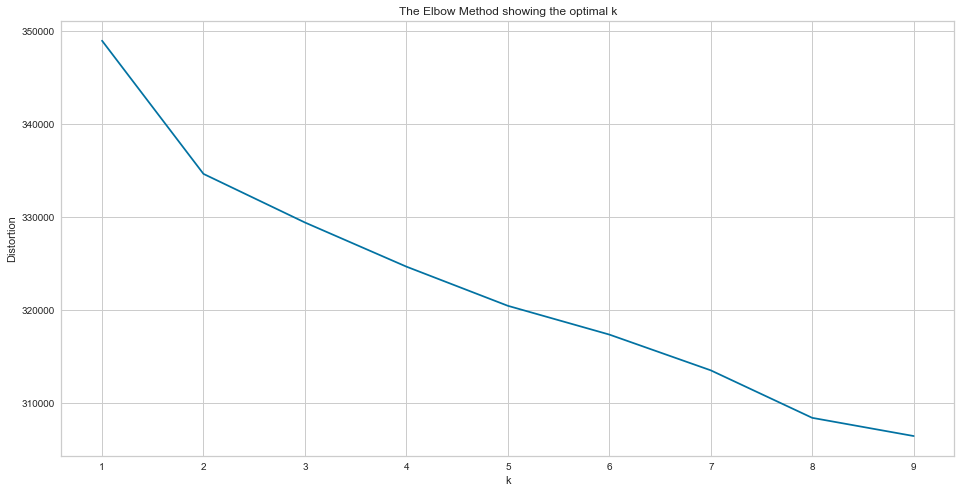

In [233]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel_1 = KMeans(init="k-means++", n_clusters=k, n_init=12, random_state=10)
    kmeanModel_1.fit(cluster_dataset)
    distortions.append(kmeanModel_1.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### As we can see the plot is a bit confusing and there is no visible Elbow. so let's try another mothod to find the best K

This time, we will use the silhouette analysis to find the best K.

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [228]:
from sklearn.metrics import silhouette_score

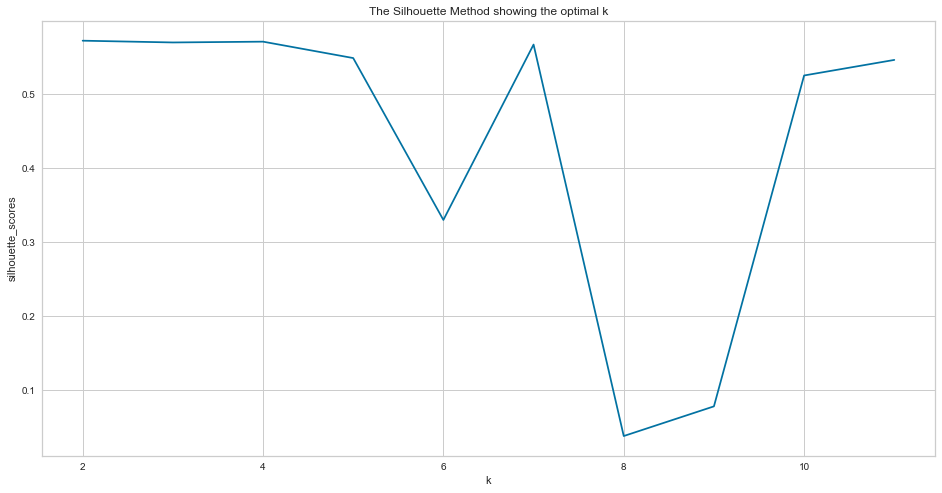

In [247]:

silhouette_scores = []
K = range(2, 12)
for k in K:
    kmeanModel_2 = KMeans(init="k-means++", n_clusters=k, n_init=12, random_state=10)
    kmeanModel_2.fit(cluster_dataset)
    silhouette_scores.append(silhouette_score(cluster_dataset, kmeanModel_2.labels_, metric='euclidean'))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

##### As we can see here the plot is much clearer. The best value for K here is 7

####  Building the Model with K = 7

In [293]:
KMeans_Model = KMeans(init="k-means++", n_clusters=7).fit(cluster_dataset)
model_labels = KMeans_Model.labels_
model_labels

array([3, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 0, 6,
       0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 6, 6, 0, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [294]:
full_dataset["label"] = model_labels

---

### 6. Visualizing the final results

In [295]:

map_africa = folium.Map(location=[8.7832, 34.5085], tiles='Stamen Terrain', zoom_start = 3)

# array of colors based on the number of cluster
colors = ['red', 'blue', 'green', 'purple', 'black', 'orange', 'pink']

# add markers of each city
for lat, long, name, label in zip(full_dataset["Latitude"], full_dataset["Longitude"], list(full_dataset.index.values), full_dataset["label"]):
    folium.Marker(
        [lat, long],
        popup=label,
        tooltip=name,
        icon=folium.Icon(color=colors[label])).add_to(map_africa)
map_africa

---

### 5. Results

One interesting this to notice about the results shown in the map above, is that the majority of the African cities are similar (cluster 0).

But noticing the pink clusters (cluster 6), we can see that cities that belongs to this cluster are located on the "corners" of africa they are all coastal cities, so we can say that they share the same characteristics.

We can also notice that there are 4 cities that don't belong to any cluster, but they formed a cluster of their. these cities are : 
- Living stone : cluster 5
- Accra : cluster 1
- Sfax : cluster 4
- Cairo : cluster 3
- Al-mansoura : cluster 2

#### Get the number of categories for each label

In [307]:
grouped = full_dataset.copy()
grouped.reset_index(drop=True, inplace=True)

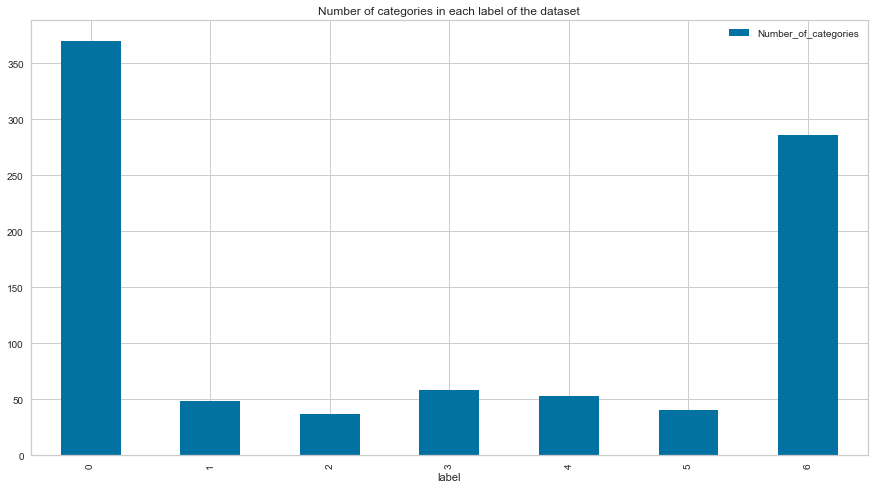

In [310]:
grouped_categories = grouped.groupby("label").apply(lambda x: (x!=0).sum())
grouped_categories["Number_of_categories"] = grouped_categories.apply(lambda x: (x!=0).sum(), axis=1)
grouped_categories[["Number_of_categories"]].plot.bar(figsize=(15, 8), title="Number of categories in each label of the dataset")

As we can see that the cluster number 0 and 6 are the most diverse clusters. they are respectively the cluster with the colors red and pink on the Folium Map. So, we can say that most of the cities of africa are diverse and that each city has much more to offer in terms of characteristics. 

---

### This concludes the assignment of this project. I really hope you enjoyed reading it.

#### Thank you for your time and have a nice day.